In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.linear_model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns


import acquire
import prepare

In [63]:
# Acquire Stage
df = acquire.get_titanic_data()

Using cached csv


### Data Preparation Stage

In [39]:
# Handle missing ages
avg_age = df.age.mean()
df.age = df.age.fillna(avg_age)

# Encode the gender column
df["is_female"] = (df.sex == "female").astype('int')

# Encode the embarked_town
# Embark_Town values are Southampton, Cherbourg, and Queenstown
dummy_df = pd.get_dummies(df[['embark_town']], dummy_na=False, drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

# Drop unnecessary columns
df = df.drop(columns=["passenger_id", "deck", "class", "embarked", "sex", "embark_town"])

df.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,1


In [40]:
# double check to make sure we don't have any nulls
df.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
is_female                  0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [60]:
# Split the datasets
train, validate, test = prepare.split_titanic_data(df)

In [61]:
# Separate out our X and y values
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

> **Insert Exploratory Data Analysis here**

### Setup the Baseline

In [43]:
# The most frequenly observed outcome will be our baseline
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [44]:
baseline_accuracy = (train.survived == 0).mean()
round(baseline_accuracy, 2)

0.62

### Exercise 1
- Create a model using age, fare, and pclass
- Does this model beat the baseline?

In [11]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.70


### Exercise 2

Create a model using age, fare, pclass, and gender

In [45]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare", "is_female"]

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.81


### Exercise 3


Try out other combinations of features and models.

Models Created:
- `logit2`, all Features, 0.81 accuracy
- `logit3`, all features with class_weight="balanced", .80 accuracy
- `logit4`, only age, .62 accuracy
- `logit5`, only pclass, .67 accuracy
- `logit6`, C hyperparameter close to zero, .62 accuracy

In [13]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.82


In [14]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.8


In [15]:
# Only Age 
features = ["age"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [16]:
# Only pclass
features = ["pclass"]

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression(random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.67


In [17]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.62
Accuracy of this Logistic Regression on training set: 0.64


## Now Let's Pick our Best Models and Evaluate on Validate!
- `logit1` trained with `features = ["age", "pclass", "fare", "is_female"]` has .81 accuracy on train
- `logit2` trained on all features, with all other hyperparameters defaulted, has .82 accuracy on train
- `logit3` trained on all features with `class_weight='balanced'` has accuracy of .80 on train

In [18]:
# Let's determine logit1's metrics on validate
features = ["age", "pclass", "fare", "is_female"]

y_pred = logit1.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214



In [19]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.80      0.86      0.82       132
           1       0.74      0.65      0.69        82

    accuracy                           0.78       214
   macro avg       0.77      0.75      0.76       214
weighted avg       0.77      0.78      0.77       214



In [20]:
# Logit3 uses all features and class_weight='balanced'
y_pred = logit3.predict(X_validate)

print("Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default")
print(classification_report(y_validate, y_pred))

Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       132
           1       0.70      0.72      0.71        82

    accuracy                           0.78       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.78      0.78      0.78       214



## What next?
- Consider the precision and recall values from each model. 
- Experiment with more hyperparameter values and combinations
- Handle the age nulls differently
    - We could try filling the nulls with median age instead of average age
    - We could drop the nulls if they weren't such a large proportion of the dataset
- Feature engineering
- Handling outliers
- Scaling (we'll do this later)

Once we have a single model doing really well on `train` and `validate`, then we'll select that model to evaluate on `test`.


#### Bonus: Choosing different probability threshold:
Default threshold value is 0.5   
We choose a **threshold t** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

- A threshold is a value we choose  
- if the probability the model gives us is above the threshold, predict positive  
- if the probability the model gives us is below the threshold, predict negative  
- .predict -- makes predictions with a threshold of .5  
- When the threshold is 0, predict everything as positive (i.e. 1)  
- When the threshold is 1, predict everything as negative (i.e. 0)

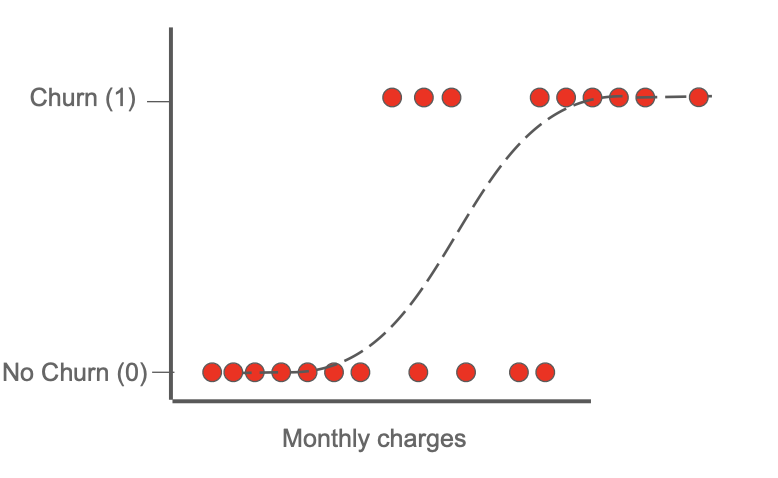

In [19]:
# using logit3 model for demo here

y_pred_proba = logit3.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.491762,0.508238
1,0.681184,0.318816
2,0.935725,0.064275
3,0.152628,0.847372
4,0.053895,0.946105


In [20]:
# Set new threshold as 0.3 instead of 0.5
t = 0.3

y_pred = (y_pred_proba.survived > t).astype(int)
y_pred.head()

0    1
1    1
2    0
3    1
4    1
Name: survived, dtype: int64

In [21]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       307
           1       0.60      0.88      0.72       191

    accuracy                           0.73       498
   macro avg       0.75      0.76      0.73       498
weighted avg       0.79      0.73      0.74       498



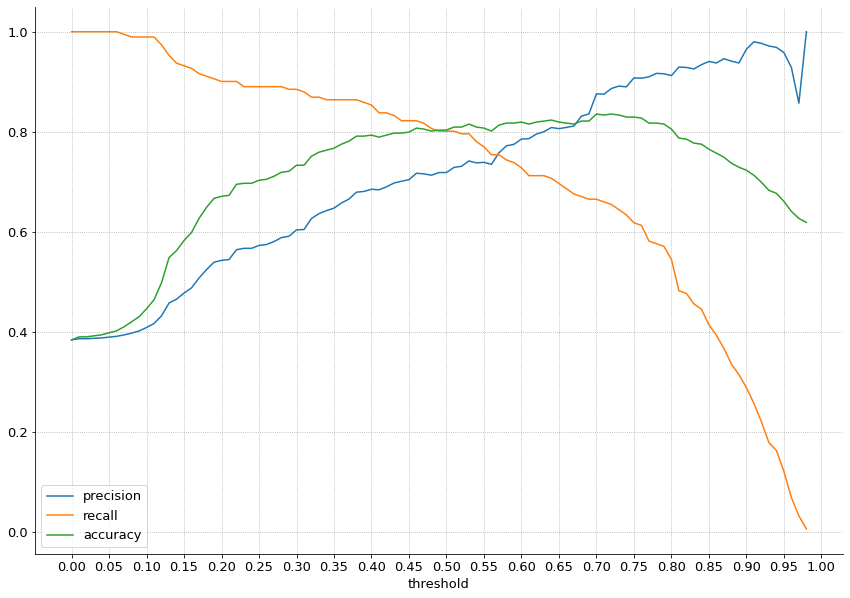

In [22]:
import logistic_regression_util

# plot metrics vs thresholds
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.survived)

Things to consider:
- Where is an acceptable balance of the metrics?
- If I'm optimizing for precision/recall, where is a point where accuracy is still good, and the other metrics aren't terrible?
- What is the cost of a false positive vs false negative?

### Bonus: Choosing C

- The C hyperparameter: can constrain the size of the coefficients

In [46]:
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(X_train, y_train)
    accuracy = model.score(X_validate, y_validate)
    coefs = dict(zip(X_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

In [58]:
# evaluate models for different values of c and create a dataframe

models = [evaluate_model(c) for c in [.0001, .001, .01, .1, 1, 10, 100, 1000]]

# convert to dataframe
(pd.DataFrame(models).round(4)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,pclass,age,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
C,accuracy,,,,,,,,,
0.0001,0.6729,-0.004,-0.008,-0.003,0.001,0.011,-0.001,0.006,0.000,-0.001
0.001,0.6822,-0.040,-0.013,-0.027,0.005,0.011,-0.012,0.059,0.004,-0.011
0.01,0.7243,-0.279,-0.018,-0.138,0.037,0.008,-0.105,0.477,0.038,-0.076
0.1,0.7944,-0.792,-0.027,-0.348,-0.024,0.001,-0.384,1.780,0.256,-0.148
1.0,0.7757,-1.155,-0.035,-0.517,-0.133,-0.001,-0.648,2.747,0.741,0.079
10.0,0.785,-1.300,-0.040,-0.647,-0.189,-0.001,-0.730,3.020,0.978,0.158
100.0,0.7757,-1.310,-0.039,-0.592,-0.201,-0.002,-0.815,2.996,0.953,0.176
1000.0,0.785,-1.302,-0.039,-0.616,-0.114,-0.002,-0.773,2.833,1.004,0.143


Takeaways:  
- Try experimenting with differing values of C on the validate split
- Choose a lower value for C to reduce overfitting (too low of a value might lead to underfitting)
- If C is important, scale your data (regularization works best with scaled data)